# Homework 7: Overfitting and Model Selection
## ECE 204 Data Science & Engineering

Some questions in this homework mention the banknote authentication dataset. The dataset included in this homework is a slight modification of the UCI Machine Learning banknote authentication dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. This dataset includes 5 features for images of different banknotes:

1. variance for a transformed image of the banknote 
2. skewness for a transformed image of the banknote
3. curtosis for a transformed image of the banknote
4. entropy of banknote images image (continuous)
5. class (integer). This specifies genuine and forged banknotes.

The bank note authentication dataset is in `banknote-auth.csv`.

Following are few questions that deal with the concept of model selection and overfitting.

In [22]:
# Add any import statements you may need here!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


---
**Problem 1.**
Import the banknote dataset in `banknote-auth.csv`. Train and test data are provided using `train_test_split`.
1. Split the training data further into **train** and **validation** sets. To accomplish this, split the **train** dataset (`X_train, y_train`) using the **`train_test_split`** method, with a **`80:20 train:test`** split, and **`random_state=0`**.
    * For the rest of the question, the 80% split of the data will be **train2** and the 20% split of the data as **validation**.
2. Train a KNN classifier on the **train2** dataset with **`K=4`**
3. **What is the accuracy of the model on the validation set?**

`NOTE`: The test dataset will not be used in this question. Feel free to ignore it. This question is focused on finding the quality of one hyper-parameter using only the train data.

In [11]:
df = pd.read_csv('banknote-auth.csv')

features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Your code here

# Further splitting the training data into train2 and validation sets
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Training a KNN classifier with K=4 on the train2 dataset
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train2, y_train2)

# Predicting the labels for the validation set
y_pred_validation = knn.predict(X_validation)

# Calculating the accuracy of the model on the validation set
accuracy = accuracy_score(y_validation, y_pred_validation)
accuracy_percentage = accuracy * 100

# Output the accuracy
print(f"Accuracy on the validation set: {accuracy_percentage:.2f}%")


Accuracy on the validation set: 97.37%


---
**Problem 2.**
Import the banknote dataset in `banknote-auth.csv`. Train and test data have been provided using `train_test_split` using the same code as above. Create a KNN classifier with 4 nearest neighbors. **What is the 5 fold cross validation score using the training data?**

* `Note:` The test dataset will not be used in this question. Feel free to ignore it. This question is focused on finding the quality of one hyper-parameter.
* `Note:` You will get 5 scores for the 5-fold cross validation. Report the mean of all such scores.
* `Hint:` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Question 1 and Question 2 are different methods to get nearly the same outcome. They are both methods to find the score for a given hyper-parameter using only the training dataset. The rest of the homework will use `cross_val_score`.

In [ ]:
df = pd.read_csv('banknote-auth.csv')

features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [15]:
# Your code here
import pandas as pd

# Load the banknote dataset
df = pd.read_csv('banknote-auth.csv')

# Define the features and labels
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

# Extracting features and labels from the dataset
X = df[features]
y = df[labels]

# Splitting the dataset into training and testing sets (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Create a KNN classifier with 4 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# Performing 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Calculating the mean of the cross-validation scores
mean_cv_score = cv_scores.mean() * 100

# Output the mean cross-validation score
print(f"Mean 5-fold cross-validation score: {mean_cv_score:.2f}%")


Mean 5-fold cross-validation score: 98.43%


---
**Problem 3.**
In the previous questions, scores for a fixed hyperparameter `K` were found. Now, let's find the best `K` for the same dataset. Only use the training data for this (it's part of the training process).

Find the best **K between 1 to 20 (both inclusive)** for the **KNN** model with **10-fold** cross-validation. `cross_val_score` returns multiple values for each `K`. But, "best" is defined to be "the highest mean score on the validation sets with `cross_val_score`." **What is the best value of `K`?** 

`Hint:` Use the training set to find the best value of `K`. It's part of the training process. You only need the training dataset for this question. Though it's not used (and it will not be asked about), reserve the testing dataset for the final model scoring.

`Gold star question:` what's the relationship between model complexity and validation error? How does `max_depth` influence the training accuracy and the test accuracy?

In [16]:
df = pd.read_csv("banknote-auth.csv")
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df.loc[:, features]
y = df.loc[:, labels]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [17]:
# Your code here

# Finding the best K value
best_k = 0
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

# Output the best K value and its score
print(f"Best K value: {best_k}")
print(f"Best mean cross-validation score: {best_score:.2f}")


Best K value: 9
Best mean cross-validation score: 0.98


---
**Problem 4.**
This question will use a `DecisionTreeClassifier` with `random_state=42`. The train and test data are given.

1. Find the best value of `max_depth` from 1 to 15 (both inclusive) with 10-fold cross validation on the given training dataset. 
2. Using this best `max_depth`, train a `DecisionTreeClassifier` (`random_state=42`) with the training data, and report accuracy on the test data.

**What is the accuracy of the DecisionTreeClassifier that uses the "best" `max_depth` value?** 

`NOTE`: `cross_val_score` will return 10 scores for 10-fold cross validation for a given classfier (with a particular max_depth). The final score for that particular classifier will be taken as the mean of the 10 scores. The **Best** max_depth is defined to be the one which returns the highest such mean score with `cross_val_score`. <br>

`NOTE:` Be sure to use the model trained with the entire training set. **Report model performance on the test data.**

In [20]:
df = pd.read_csv("banknote-auth.csv")
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [21]:
# Your code here

# Finding the best value of max_depth
best_max_depth = 0
best_score = 0

for depth in range(1, 16):
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dtree, X_train, y_train, cv=10)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_max_depth = depth

# Training the DecisionTreeClassifier with the best max_depth value
dtree_best = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dtree_best.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_test = dtree_best.predict(X_test)

# Calculating the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test = accuracy_test * 100

# Output the best max_depth value and its test accuracy
print(f"Best max_depth value: {best_max_depth}")
print(f"Accuracy on the test data: {accuracy_percentage_test:.2f}%")


Best max_depth value: 7
Accuracy on the test data: 96.73%


---
**Problem 5.**
Both overfitting and underfitting can be dangerous. In this question, use **10-fold** cross validation to score different values of `max_depth` (from 1 to 20, both inclusive) for a **DecisionTreeClassifier** (use `random_state=42`). <br>
Generate a graph of `max_depth` vs mean 10-fold cross validation accuracy. Using this graph, you can find the range of `max_depths` that under- and over-fit.

**What range of `max_depth` values seem like they will optimally fit the DecisionTreeClassifier on the data?** `max_depth` should vary from 1 to 20 (both inclusive). For each value of `max_depth`, find the mean 10-fold cross validation score for a DecisionTreeClassifier having that `max_depth` using the training data. `max_depth` is a good proxy for model complexity.


Options:
- 1-3
- 4-9
- 10-13
- 15-20

In [34]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=20000, noise=0.30, random_state=42)

circles_df = pd.DataFrame({"feat1": X[:, 0], "feat2": X[:, 1], "label": y})
circles_df.head(n=3)

,feat1,feat2,label
0,0.681804,-0.016924,1
1,0.161951,0.910495,0
2,0.274173,-0.416503,0


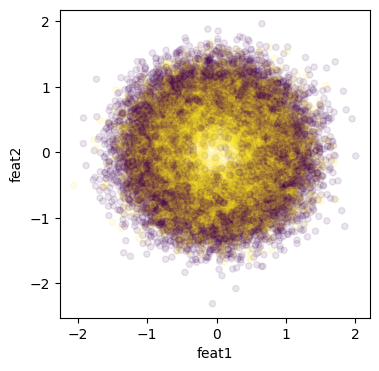

In [35]:
X = circles_df[["feat1", "feat2"]]
y = circles_df["label"]

# Visualizing the dataset
circles_df.plot.scatter(x="feat1",y="feat2",c="label",
                        cmap="viridis", colorbar=False, figsize=(4, 4), alpha=0.1);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

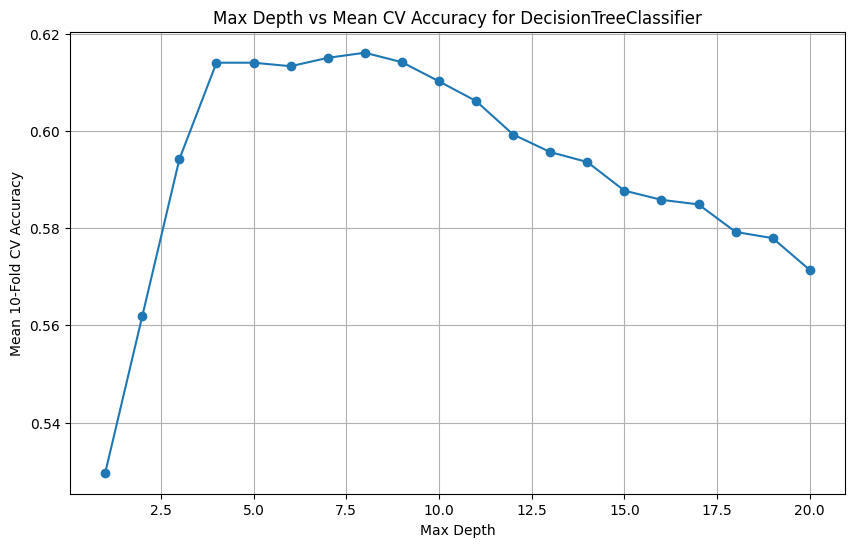

In [37]:
# Your code here

# Generate the circles dataset
X, y = make_circles(n_samples=20000, noise=0.30, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Explore max_depth values from 1 to 20
max_depth_range = range(1, 21)
mean_cv_scores = []

for depth in max_depth_range:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dtree, X_train, y_train, cv=10)
    mean_cv_scores.append(scores.mean())

# Plotting the graph of max_depth vs mean 10-fold cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, mean_cv_scores, marker='o')
plt.title('Max Depth vs Mean CV Accuracy for DecisionTreeClassifier')
plt.xlabel('Max Depth')
plt.ylabel('Mean 10-Fold CV Accuracy')
plt.grid(True)
plt.show()
